# Part C: Community Detection in Co-Word Network

## Description
This part involves constructing a co-word network based on the keywords from academic theses related to **Dr. Babak Teimourpour**.

### Objectives
1. **Data Preparation**:
   - Load the JSON data containing theses and their associated keywords.
   - Create a co-word matrix representing keyword occurrences across theses.

2. **Community Detection**:
   - **Louvain Method**:
     - Perform community detection using the Louvain method.
     - Visualize the resulting communities with distinct color coding.
     - Report the modularity of the detected communities.
   - **Spinglass Method**:
     - Perform community detection using the Spinglass method.
     - Visualize the communities, ensuring clear color distinction.
     - Report the modularity of the Spinglass communities.

3. **Comparison**:
   - Compare the detected communities using the **Rand Index** to evaluate community structure similarity.
   - Report modularity values for both methods to assess community quality.

### Results
The results include visualizations of the co-word network with color-coded communities for both methods, the Rand Index value for community similarity, and the modularity scores for each method.



## Step 1: Import Necessary Libraries

We will begin by importing the necessary libraries for our analysis.

In [1]:
# Import necessary libraries
import json
import community as community_louvain  # Louvain method for community detection
import networkx as nx
import numpy as np
import igraph as ig  # For Spinglass community detection
import matplotlib.cm as cm  # For color mapping
import matplotlib.pyplot as plt

## Step 2: Load the JSON Data

We will load the JSON data containing the theses and keywords, and create lists for thesis titles and unique keywords.

In [2]:
# Load the JSON data (containing theses and keywords)
with open('test.json', 'r', encoding='utf-8') as file:
    theses_data = json.load(file)

# Create two lists: one for thesis titles and another for unique keywords
thesis_titles = []  # Titles of theses or papers
unique_keywords = []  # Unique keywords

# Populate the lists with data from the JSON file
for thesis in theses_data:
    thesis_titles.append(thesis['title'])  # Add the thesis title to the list
    for keyword in thesis['tag']:  # Iterate through the tags/keywords
        if keyword not in unique_keywords:  # Check for uniqueness
            unique_keywords.append(keyword)  # Add the keyword to the list if it's not already present

# Create a matrix for keyword occurrences (theses by keywords)
co_word_matrix = np.zeros(shape=(len(thesis_titles), len(unique_keywords)))

# Populate the matrix with 1s where a thesis contains a keyword
for i in range(len(thesis_titles)):
    for j in range(len(unique_keywords)):
        if unique_keywords[j] in theses_data[i]['tag']:  # Check if the keyword exists in the thesis tags
            co_word_matrix[i][j] = 1  # Set matrix entry to 1 if the keyword is present

## Step 3: Create the Co-word Network Graph

We will create the co-word network graph from the co-occurrence matrix.

In [3]:
# Convert the co-occurrence matrix to a weighted NetworkX graph
co_occurrence_matrix = np.dot(co_word_matrix.T, co_word_matrix)  # Create the co-occurrence matrix
G_co_word = nx.from_numpy_array(co_occurrence_matrix, create_using=nx.Graph)

# Remove self-loops
G_co_word.remove_edges_from(nx.selfloop_edges(G_co_word))

# Remove isolated nodes (nodes with no edges)
isolated_nodes = list(nx.isolates(G_co_word))
print(f"Number of isolated nodes: {len(isolated_nodes)}")
G_co_word.remove_nodes_from(isolated_nodes)

# Check if the graph is connected after removing isolated nodes
if nx.is_connected(G_co_word):
    print("The graph is connected after removing isolated nodes.")
else:
    print("The graph is not connected, but isolated nodes have been removed.")

Number of isolated nodes: 2
The graph is not connected, but isolated nodes have been removed.


## Step 4: Perform Louvain Community Detection

We will perform community detection using the Louvain method and calculate modularity.

In [7]:
# Perform Louvain community detection on the connected graph (after removing isolated nodes)
# resolution = 1.5  # Adjust this value as necessary
partition = community_louvain.best_partition(G_co_word)

# Calculate modularity
modularity = community_louvain.modularity(partition, G_co_word)
print(f"Modularity: {modularity:.4f}")

# Get the number of communities
num_communities = len(set(partition.values()))
print(f"Number of communities detected: {num_communities}")

# Print the communities
communities = {}
for keyword, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(keyword)

# Display the detected communities and count keywords in each community
for community_id, keywords in communities.items():
    print(f"Community {community_id}: {len(keywords)} keywords")
    print(f"Keywords: {keywords}")

Modularity: 0.7364
Number of communities detected: 39
Community 0: 76 keywords
Keywords: [0, 1, 2, 3, 4, 5, 6, 33, 34, 35, 94, 95, 96, 156, 157, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 270, 271, 272, 273, 274, 275, 276, 277, 299, 302, 303, 304, 332, 333, 335, 336, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 386, 387, 388, 393, 403, 409, 410, 411, 413, 466, 467, 477, 478, 479, 501, 502, 503, 504, 505, 506, 569, 570]
Community 1: 55 keywords
Keywords: [7, 8, 9, 10, 11, 12, 13, 14, 15, 59, 66, 67, 68, 69, 70, 84, 169, 170, 171, 172, 253, 254, 255, 263, 264, 265, 266, 267, 268, 269, 293, 294, 295, 296, 297, 298, 300, 301, 404, 405, 436, 437, 438, 439, 440, 441, 442, 463, 464, 465, 518, 519, 549, 550, 556]
Community 2: 36 keywords
Keywords: [16, 17, 18, 19, 20, 25, 26, 27, 158, 160, 178, 179, 278, 334, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 461, 462, 595, 596, 597, 598, 599, 600]
Community 11: 32 keywords
Keywords: [21, 22, 23, 2

## Step 5: Visualize the Louvain Communities

We will visualize the detected communities from the Louvain method using a color map.

C:\Users\AsusIran\AppData\Local\Temp\ipykernel_25192\2899688902.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set3', num_communities)  # Use the Set3 colormap for distinct colors


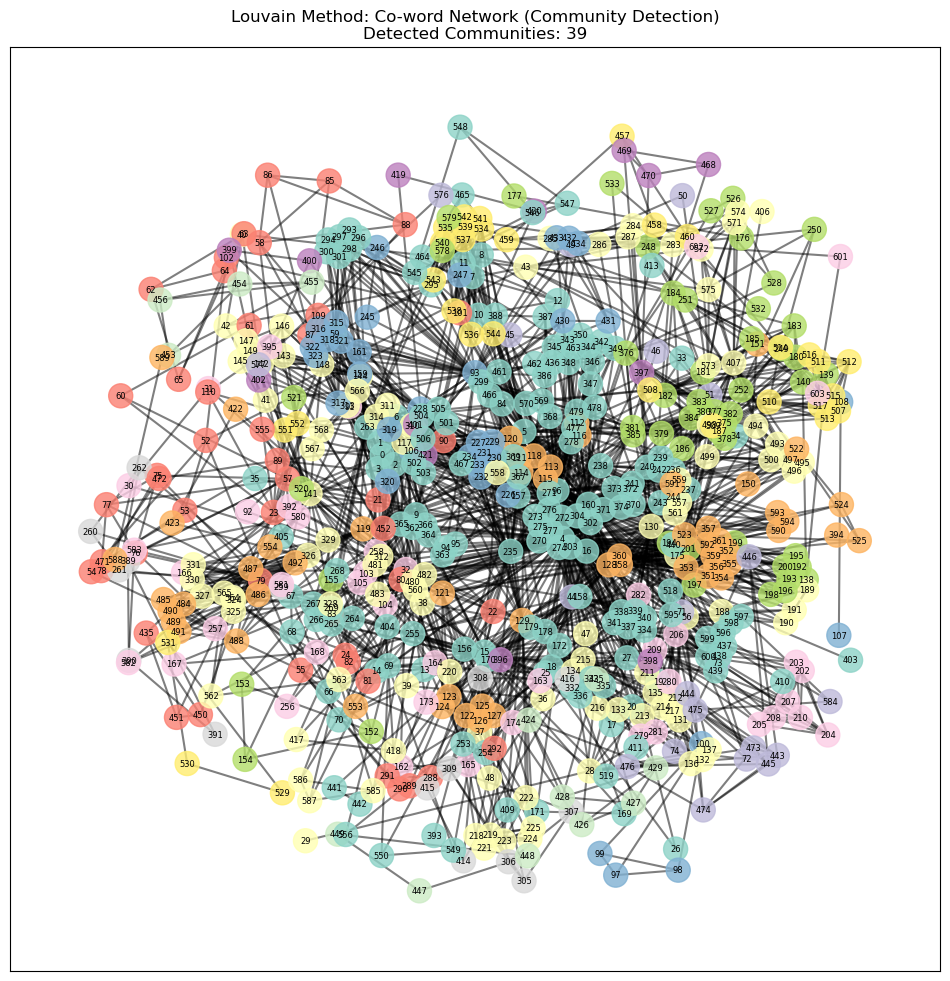

In [22]:
# Assign a color to each community
cmap = cm.get_cmap('Set3', num_communities)  # Use the Set3 colormap for distinct colors
node_colors = [cmap(partition[node] % cmap.N) for node in G_co_word.nodes]  # Ensure the index is within bounds

# Visualize the graph with community coloring
plt.figure(figsize=(12, 12))

# Use a different layout algorithm
pos = nx.spring_layout(G_co_word, k=0.3, iterations=50)  # Adjust k for better spacing

# Draw the nodes with increased size
nx.draw_networkx_nodes(G_co_word, pos, node_color=node_colors, node_size=300, alpha=0.8)

# Draw the edges with increased width
nx.draw_networkx_edges(G_co_word, pos, width=1.5, alpha=0.5)

# Add labels to nodes (keywords)
nx.draw_networkx_labels(G_co_word, pos, font_size=6, font_color='black')

# Set the plot title
plt.title(f'Louvain Method: Co-word Network (Community Detection)\nDetected Communities: {num_communities}')

# Save the plot
plt.savefig('Results/Co-word Network Louvain Communities.png')
plt.show()
plt.close()

## Step 6: Perform Spinglass Community Detection

Now we will perform community detection using the Spinglass method.

In [17]:
# Perform Spinglass community detection on the connected graph
# Convert the NetworkX graph to an igraph graph
edges_without_weights = G_co_word.edges()
G_igraph = ig.Graph.TupleList(edges_without_weights, directed=False)

# Check if the graph is connected before running Spinglass
if not G_igraph.is_connected():
    print("The graph is not connected. Using largest connected component for Spinglass detection.")
    G_igraph = G_igraph.clusters().giant()

# Perform Spinglass community detection
spinglass_communities = G_igraph.community_spinglass()

# Get the number of communities for Spinglass
num_communities_spinglass = len(spinglass_communities)
print(f"Number of communities detected (Spinglass): {num_communities_spinglass}")

# Create a mapping of nodes to their respective communities
community_dict_spinglass = {}
for community_id, community in enumerate(spinglass_communities):
    for node in community:
        community_dict_spinglass[node] = community_id

# Print the communities and count keywords in each community for Spinglass
communities_spinglass = {}
for keyword, community_id in community_dict_spinglass.items():
    if community_id not in communities_spinglass:
        communities_spinglass[community_id] = []
    communities_spinglass[community_id].append(keyword)

for community_id, keywords in communities_spinglass.items():
    print(f"Spinglass Community {community_id}: {len(keywords)} keywords")
    print(f"Keywords: {keywords}")

# Calculate modularity for Spinglass
modularity_spinglass = G_igraph.modularity(spinglass_communities)
print(f"Spinglass Modularity: {modularity_spinglass:.4f}")


The graph is not connected. Using largest connected component for Spinglass detection.
Number of communities detected (Spinglass): 17
Spinglass Community 0: 27 keywords
Keywords: [15, 33, 34, 35, 149, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 263, 264, 265, 266, 267, 454, 455, 456, 457]
Spinglass Community 1: 31 keywords
Keywords: [0, 1, 2, 3, 5, 6, 16, 17, 42, 43, 122, 124, 150, 151, 159, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185]
Spinglass Community 2: 34 keywords
Keywords: [29, 30, 31, 93, 94, 117, 118, 119, 120, 121, 123, 141, 142, 143, 222, 223, 224, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344]
Spinglass Community 3: 8 keywords
Keywords: [241, 242, 243, 244, 245, 246, 247, 248]
Spinglass Community 4: 57 keywords
Keywords: [4, 18, 40, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 95, 96, 97, 98, 99, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 144, 145

C:\Users\AsusIran\AppData\Local\Temp\ipykernel_25192\70145894.py:9: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  G_igraph = G_igraph.clusters().giant()


## Step 7: Visualize the Spinglass Communities

We will visualize the detected communities using the Spinglass method.

C:\Users\AsusIran\AppData\Local\Temp\ipykernel_25192\1902019680.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_spinglass = cm.get_cmap('Set2', num_communities_spinglass)  # Use the Set2 colormap for distinct colors


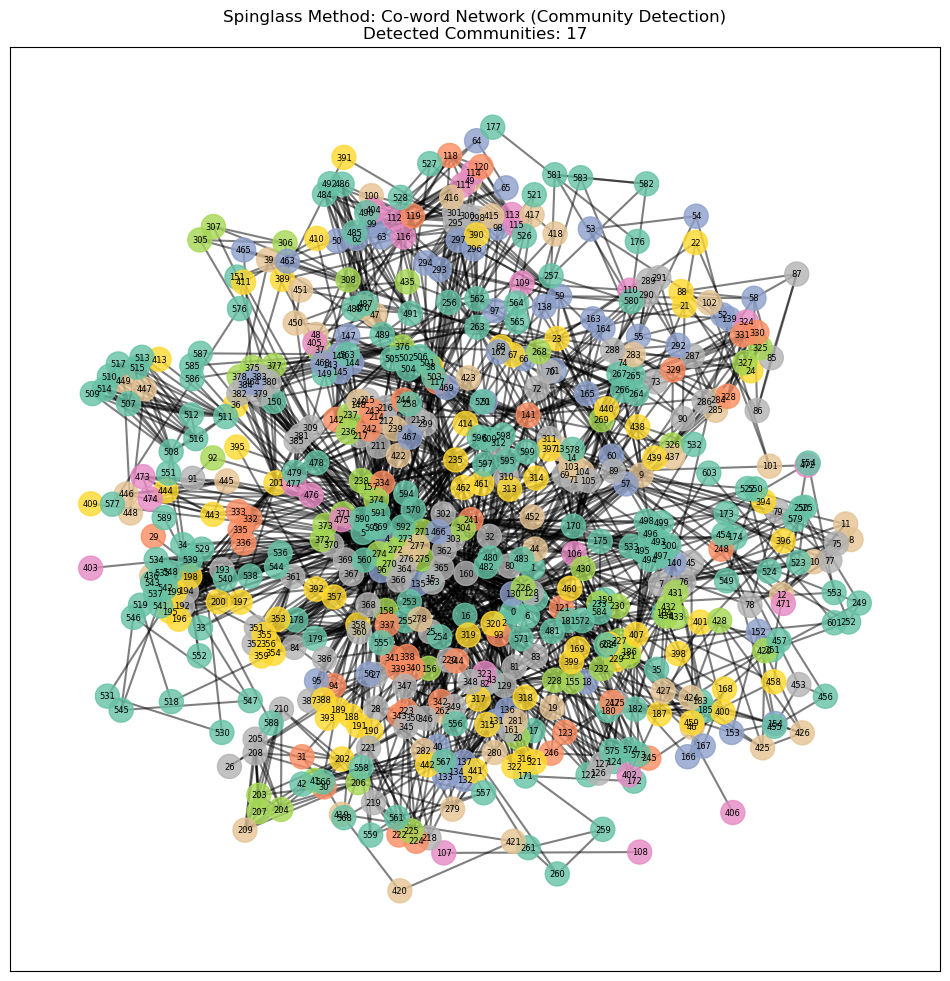

In [23]:
# Assign a color to each community
cmap_spinglass = cm.get_cmap('Set2', num_communities_spinglass)  # Use the Set2 colormap for distinct colors
node_colors_spinglass = []
for node in G_co_word.nodes:
    module_id = community_dict_spinglass.get(node, 0)  
    node_colors_spinglass.append(cmap_spinglass(module_id % cmap_spinglass.N))  # Ensure the index is within bounds

# Use a different layout algorithm
pos = nx.spring_layout(G_co_word, k=0.3, iterations=50)  # Adjust k for better spacing

# Visualize the graph with community coloring
plt.figure(figsize=(12, 12))

# Draw the nodes with increased size
nx.draw_networkx_nodes(G_co_word, pos, node_color=node_colors_spinglass, node_size=300, alpha=0.8)

# Draw the edges with increased width
nx.draw_networkx_edges(G_co_word, pos, width=1.5, alpha=0.5)

# Add labels to nodes (keywords)
nx.draw_networkx_labels(G_co_word, pos, font_size=6, font_color='black')

# Set the plot title
plt.title(f'Spinglass Method: Co-word Network (Community Detection)\nDetected Communities: {num_communities_spinglass}')

# Save the plot
plt.savefig('Results/Co-word Network Spinglass Communities.png')
plt.show()
plt.close()

## Step 8: Summary Statistics

We will print some statistics about the co-word graph and the community detection results from both methods.

In [24]:
# Print statistics of the co-word graph and community detection methods
print(f"Total Unique Keywords: {len(unique_keywords)}")
print(f"Number of Co-word Graph Nodes (after removing isolated nodes): {G_co_word.number_of_nodes()}")
print(f"Number of Co-word Graph Edges: {G_co_word.number_of_edges()}")
print(f"Detected Communities (Louvain): {num_communities}")
print(f"Detected Communities (Spinglass): {num_communities_spinglass}")

# Export the graph with community detection to GEXF format for Gephi
output_path_spinglass = 'Results/Co-word Network Spinglass Communities.gexf'

Total Unique Keywords: 604
Number of Co-word Graph Nodes (after removing isolated nodes): 602
Number of Co-word Graph Edges: 2452
Detected Communities (Louvain): 39
Detected Communities (Spinglass): 17


## Step 9: Calculate Modularity for Each Method

First, we will calculate the modularity for each community detection method.

In [25]:
# Calculate modularity for Louvain method
modularity_louvain = community_louvain.modularity(partition, G_co_word)
print(f"Louvain Modularity: {modularity_louvain:.4f}")

# Calculate modularity for Spinglass method
modularity_spinglass = G_igraph.modularity(spinglass_communities)
print(f"Spinglass Modularity: {modularity_spinglass:.4f}")

Louvain Modularity: 0.7364
Spinglass Modularity: 0.7030


## Step 10: Calculate the Rand Index

Now we will calculate the Rand Index to compare the two community partitions.

In [27]:
from sklearn.metrics import adjusted_rand_score

# Get the community assignments for both methods
louvain_labels = np.array([partition[node] for node in G_co_word.nodes])
spinglass_labels = np.array([community_dict_spinglass.get(node, -1) for node in G_co_word.nodes])  # Use community_dict_spinglass

# Calculate the adjusted Rand Index
rand_index = adjusted_rand_score(louvain_labels, spinglass_labels)
print(f"Adjusted Rand Index: {rand_index:.4f}")

Adjusted Rand Index: 0.0551


## Step 11: Output the Results

Finally, we will summarize the results of our comparisons.

In [28]:
# Output the results
print("Comparison of Community Detection Methods:")
print(f"Louvain Modularity: {modularity_louvain:.4f}")
print(f"Spinglass Modularity: {modularity_spinglass:.4f}")
print(f"Adjusted Rand Index: {rand_index:.4f}")

Comparison of Community Detection Methods:
Louvain Modularity: 0.7364
Spinglass Modularity: 0.7030
Adjusted Rand Index: 0.0551
